In [1]:
%matplotlib inline
import statistics as s
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [57]:
pd.set_option('display.max_rows', None)

In [58]:
df = pd.read_csv('2022_Competition_Training.csv', na_values = ['null' , '*'], keep_default_na = True)

In [59]:
df.isnull().sum().sort_values(ascending = False)

cms_risk_adj_payment_rate_b_amt                       48276
cms_tot_partd_payment_amt                             45981
credit_hh_agencyfirstmtg_new                          45299
credit_bal_autobank_new                               45243
credit_num_autobank_new                               45238
credit_num_nonmtgcredit_60dpd                         45232
credit_prcnt_mtgcredit                                45217
credit_bal_bankcard_severederog                       45212
credit_bal_consumerfinance_new                        45188
credit_hh_autobank                                    45181
credit_bal_nonmtgcredit_60dpd                         45173
credit_num_1stmtg_collections                         43469
cons_lwcm10                                           21417
cms_rx_risk_score_nbr                                 20313
cms_ma_risk_score_nbr                                 19397
cms_partd_ra_factor_amt                               18975
lang_spoken_cd                          

In [60]:
## Checking records based on number of nulls
(df.isnull().sum(axis = 1) > 40).sum()

2843

In [61]:
df[(df.isnull().sum(axis = 1) > 40)]['hi_flag'].sum() / df['hi_flag'].sum()

0.08734655335221908

In [62]:
df['hi_flag'].sum()*100/len(df['hi_flag'])

4.385093167701863

<AxesSubplot:>

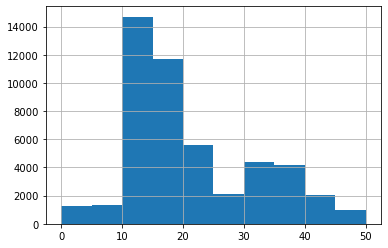

In [64]:
df.isnull().sum(axis = 1).hist(bins = range(0,51,5))

In [65]:
df.cms_race_cd.unique()

array([ 1.,  6.,  2.,  3.,  5.,  4.,  0., nan])

In [66]:
df.rucc_category.unique() 

array(['3-Metro', '1-Metro', '2-Metro', '5-Nonmetro', '4-Nonmetro',
       '6-Nonmetro', '7-Nonmetro', '8-Nonmetro', '9-Nonmetro'],
      dtype=object)

In [67]:
df.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16,hi_flag
0,100039218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.08,33511.0,0.0,0.0,0.00,0.0,9.1,NaN,0
1,100042427.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,176797.0,0.0,0.0,0.00,0.0,6.8,0.670459,0
2,100055103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,380673.0,0.0,0.0,0.00,0.0,8.3,0.879186,0
3,100074556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,267696.0,0.0,0.0,0.00,0.0,7.3,0.746201,0
4,100079932.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,19095.0,0.0,0.0,0.25,0.0,6.9,NaN,0


In [68]:
hd = pd.read_csv('2022_Competition_Holdout.csv', na_values = 'null', keep_default_na = True)

C:\Users\egsra\AppData\Local\Temp\ipykernel_20384\435475557.py:1: DtypeWarning: Columns (760) have mixed types. Specify dtype option on import or set low_memory=False.
  hd = pd.read_csv('2022_Competition_Holdout.csv', na_values = 'null', keep_default_na = True)


In [69]:
hd.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cci_ren_m_pmpm_ct,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16
0,100093066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.08,56707.0,0.0,0.0,0.16,0.0,5.7,1.072233
1,100313000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,83699.0,0.0,0.0,0.00,0.0,6.4,1.401754
2,100330875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,702890.0,0.0,0.0,0.00,0.0,8.9,0.489536
3,100346385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.0,0.00,1323059.0,0.0,0.0,0.25,0.0,7.7,0.780388
4,100443164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.00,285449.0,0.0,0.0,0.00,0.0,7.5,0.745321


In [70]:
hd.isnull().sum().sort_values(ascending = False)

cms_risk_adj_payment_rate_b_amt                       12218
cms_tot_partd_payment_amt                             11604
credit_hh_agencyfirstmtg_new                          11455
credit_bal_autobank_new                               11448
credit_prcnt_mtgcredit                                11447
credit_num_nonmtgcredit_60dpd                         11443
credit_num_autobank_new                               11440
credit_bal_bankcard_severederog                       11434
credit_bal_consumerfinance_new                        11429
credit_hh_autobank                                    11426
credit_bal_nonmtgcredit_60dpd                         11419
credit_num_1stmtg_collections                         10991
cons_lwcm10                                            5322
cms_rx_risk_score_nbr                                  5137
cms_ma_risk_score_nbr                                  4918
lang_spoken_cd                                         4849
cms_partd_ra_factor_amt                 

In [71]:
hd.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cci_ren_m_pmpm_ct,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16
0,100093066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.08,56707.0,0.0,0.0,0.16,0.0,5.7,1.072233
1,100313000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,83699.0,0.0,0.0,0.00,0.0,6.4,1.401754
2,100330875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,702890.0,0.0,0.0,0.00,0.0,8.9,0.489536
3,100346385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.0,0.00,1323059.0,0.0,0.0,0.25,0.0,7.7,0.780388
4,100443164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.00,285449.0,0.0,0.0,0.00,0.0,7.5,0.745321


In [72]:
hd.head()

,id,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,...,cci_ren_m_pmpm_ct,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16
0,100093066.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.08,56707.0,0.0,0.0,0.16,0.0,5.7,1.072233
1,100313000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,83699.0,0.0,0.0,0.00,0.0,6.4,1.401754
2,100330875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,702890.0,0.0,0.0,0.00,0.0,8.9,0.489536
3,100346385.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.33,0.0,0.00,1323059.0,0.0,0.0,0.25,0.0,7.7,0.780388
4,100443164.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.08,0.0,0.00,285449.0,0.0,0.0,0.00,0.0,7.5,0.745321


In [73]:
df.dtypes.sort_values(ascending = False)

lang_spoken_cd                                         object
cms_ra_factor_type_cd                                  object
cons_homstat                                           object
cons_mobplus                                           object
sex_cd                                                 object
rucc_category                                          object
id                                                    float64
cmsd2_ano_chr_ab_pmpm_ct                              float64
cci_pvd_pmpm_ct                                       float64
cmsd2_inf_infect_agents_pmpm_ct                       float64
rx_hum_25_pmpm_ct                                     float64
total_ip_rehab_admit_ct_pmpm                          float64
cnt_cp_vat_8                                          float64
rx_hum_73_pmpm_cost                                   float64
cnt_cp_emails_11                                      float64
cmsd1_gus_pmpm_ct                                     float64
rx_hum_4

In [74]:
df['sex_cd'].unique()

array(['M', 'F'], dtype=object)

In [75]:
df['lang_spoken_cd'].unique()

array(['ENG', nan, 'SPA'], dtype=object)

In [76]:
df['cms_orig_reas_entitle_cd'].unique()

array([ 0.,  1., nan,  3.,  2.])

In [77]:
df['cms_race_cd'].unique()

array([ 1.,  6.,  2.,  3.,  5.,  4.,  0., nan])

In [78]:
df['cons_mobplus'].unique()

array(['M', 'S', nan, 'U', 'P'], dtype=object)

In [79]:
df['cons_homstat'].unique()

array(['R', 'Y', 'U', nan, 'P', 'T'], dtype=object)

In [80]:
df['rucc_category'].unique()

array(['3-Metro', '1-Metro', '2-Metro', '5-Nonmetro', '4-Nonmetro',
       '6-Nonmetro', '7-Nonmetro', '8-Nonmetro', '9-Nonmetro'],
      dtype=object)

In [81]:
df['cms_ra_factor_type_cd'].unique()

array(['CN', 'CF', 'CP', 'E', nan, 'D', 'C2', 'SE'], dtype=object)

In [82]:
##Cleaning categorical features
print(df['cms_orig_reas_entitle_cd'].astype('category').unique())
df['cms_orig_reas_entitle_cd'] = df['cms_orig_reas_entitle_cd'].astype('category')


[0.0, 1.0, NaN, 3.0, 2.0]
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]


C:\Users\egsra\AppData\Local\Temp\ipykernel_20384\2401657420.py:2: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(df['cms_orig_reas_entitle_cd'].astype('category').unique())


In [83]:
print(df['cms_race_cd'].astype('category').unique())
df['cms_race_cd'] = df['cms_race_cd'].astype('category')

[1.0, 6.0, 2.0, 3.0, 5.0, 4.0, 0.0, NaN]
Categories (7, float64): [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]


C:\Users\egsra\AppData\Local\Temp\ipykernel_20384\3774716355.py:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(df['cms_race_cd'].astype('category').unique())


In [84]:
df['sex_cd'] = df['sex_cd'].astype('category')
df['lang_spoken_cd'] = df['lang_spoken_cd'].astype('category')
df['cons_mobplus'] = df['cons_mobplus'].astype('category')
df['cons_homstat'] = df['cons_homstat'].astype('category')
df['rucc_category'] = df['rucc_category'].astype('category')
df['cms_ra_factor_type_cd'] = df['cms_ra_factor_type_cd'].astype('category')
df['hi_flag'] = df['hi_flag'].astype('category')

In [85]:
df[['sex_cd', 'lang_spoken_cd',
    'cons_mobplus', 'cons_homstat', 'rucc_category',
    'cms_ra_factor_type_cd', 'cms_orig_reas_entitle_cd','hi_flag' ,'cms_race_cd']].dtypes

sex_cd                      category
lang_spoken_cd              category
cons_mobplus                category
cons_homstat                category
rucc_category               category
cms_ra_factor_type_cd       category
cms_orig_reas_entitle_cd    category
hi_flag                     category
cms_race_cd                 category
dtype: object

In [86]:
# Not used yet
#from sklearn.preprocessing import LabelEncoder
#labelencoder_y = LabelEncoder()
#Y = labelencoder_y.fit_transform(Y)

In [87]:
#Defining X and y
X = df.drop(['id', 'hi_flag'], axis=1)
y = df['hi_flag']

In [88]:
#Taking too long
#from sklearn.impute import SimpleImputer
#from sklearn.impute import KNNImputer

#imputer_num = KNNImputer(n_neighbors=2, weights="uniform")
#X_num = X.drop(['sex_cd', 'lang_spoken_cd',
#    'cons_mobplus', 'cons_homstat', 'rucc_category',
#    'cms_ra_factor_type_cd', 'cms_orig_reas_entitle_cd','cms_race_cd'], axis=1)
#X_num_cols = X_num.columns

#imputed_arr_num = imputer_num.fit_transform(X_num)
#imputed_df_num = pd.DataFrame(imputed_arr_num,columns=columns)

#print(imputed_arr)

In [89]:
#Imputing numerical variables
from sklearn.impute import SimpleImputer

imputer_num = SimpleImputer(strategy="mean")

X_num = X.drop(['sex_cd', 'lang_spoken_cd',
    'cons_mobplus', 'cons_homstat', 'rucc_category',
    'cms_ra_factor_type_cd', 'cms_orig_reas_entitle_cd','cms_race_cd'], axis=1)
X_num_cols = X_num.columns

imputed_arr_num = imputer_num.fit_transform(X_num)
#print(imputed_arr)
imputed_df_num = pd.DataFrame(imputed_arr_num,columns=X_num_cols)

In [90]:
imputed_df_num.isnull().sum().unique()

array([0], dtype=int64)

In [91]:
imputed_df_num.head()

,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,...,cci_ren_m_pmpm_ct,cmsd2_ext_nature_pmpm_ct,cmsd2_gus_m_genital_pmpm_ct,atlas_totalpopacs,cmsd2_neo_neo_other_pmpm_ct,cmsd2_dig_hernia_pmpm_ct,cmsd2_sns_blood_pmpm_ct,cmsd2_ext_compl_medical_care_pmpm_ct,rwjf_food_env_inx,atlas_snapspth16
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.16,0.0,0.08,33511.0,0.0,0.0,0.00,0.0,9.1,0.751892
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.50,0.0,0.00,176797.0,0.0,0.0,0.00,0.0,6.8,0.670459
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,380673.0,0.0,0.0,0.00,0.0,8.3,0.879186
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,267696.0,0.0,0.0,0.00,0.0,7.3,0.746201
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.0,0.00,19095.0,0.0,0.0,0.25,0.0,6.9,0.751892


In [92]:
# Imputing categorical variables
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy="most_frequent")

X_cat = X[['sex_cd', 'lang_spoken_cd',
    'cons_mobplus', 'cons_homstat', 'rucc_category',
    'cms_ra_factor_type_cd', 'cms_orig_reas_entitle_cd','cms_race_cd']]
X_cat_cols = X_cat.columns

imputed_arr_cat = imputer_cat.fit_transform(X_cat)
imputed_df_cat = pd.DataFrame(imputed_arr_cat,columns = X_cat_cols)

In [93]:
imputed_df_cat.dtypes.unique()

array([dtype('O')], dtype=object)

In [94]:
imputed_df_cat.head()

,sex_cd,lang_spoken_cd,cons_mobplus,cons_homstat,rucc_category,cms_ra_factor_type_cd,cms_orig_reas_entitle_cd,cms_race_cd
0,M,ENG,M,R,3-Metro,CN,0.0,1.0
1,F,ENG,M,Y,1-Metro,CN,0.0,6.0
2,F,ENG,S,U,2-Metro,CN,0.0,1.0
3,F,ENG,M,Y,2-Metro,CF,0.0,2.0
4,M,ENG,M,Y,5-Nonmetro,CP,1.0,1.0


In [95]:
imputed_df_cat.isnull().sum().unique()

array([0], dtype=int64)

In [ ]:
#Ordinal for rucc_category
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
rucc_arr = ordinal_encoder.fit_transform(imputed_df_cat['rucc_category'].values.reshape(-1,1))[:,0]
ord_rucc_df = pd.Series(rucc_arr,name = 'rucc_category')
ord_rucc_df

In [97]:
#One hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

one_hot_x = imputed_df_cat[['sex_cd', 'lang_spoken_cd',
    'cons_mobplus', 'cons_homstat',
    'cms_ra_factor_type_cd', 'cms_orig_reas_entitle_cd','cms_race_cd']]

print(one_hot_x.head())
one_hot_x_cols = one_hot_x.columns

#cat_1hot_arr = cat_encoder.fit_transform(one_hot_x)
#one_hot_df = pd.DataFrame(cat_1hot_arr.toarray())

one_hot_df = pd.get_dummies(one_hot_x, prefix="Type_is")


  sex_cd lang_spoken_cd cons_mobplus cons_homstat cms_ra_factor_type_cd  \
0      M            ENG            M            R                    CN   
1      F            ENG            M            Y                    CN   
2      F            ENG            S            U                    CN   
3      F            ENG            M            Y                    CF   
4      M            ENG            M            Y                    CP   

  cms_orig_reas_entitle_cd cms_race_cd  
0                      0.0         1.0  
1                      0.0         6.0  
2                      0.0         1.0  
3                      0.0         2.0  
4                      1.0         1.0  


C:\Users\egsra\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [98]:
one_hot_df.head()

,Type_is_F,Type_is_M,Type_is_ENG,Type_is_SPA,Type_is_M,Type_is_P,Type_is_S,Type_is_U,Type_is_P,Type_is_R,...,Type_is_1.0,Type_is_2.0,Type_is_3.0,Type_is_0.0,Type_is_1.0,Type_is_2.0,Type_is_3.0,Type_is_4.0,Type_is_5.0,Type_is_6.0
0,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [99]:
X = pd.concat([imputed_df_num, one_hot_df, ord_rucc_df], axis = 1)

In [100]:
y.value_counts()

0    46182
1     2118
Name: hi_flag, dtype: int64

In [101]:
X.head(10)

,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,...,Type_is_2.0,Type_is_3.0,Type_is_0.0,Type_is_1.0,Type_is_2.0,Type_is_3.0,Type_is_4.0,Type_is_5.0,Type_is_6.0,rucc_category
0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,2.0
1,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,1,0.0
2,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,1.0
3,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,1.0
4,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,4.0
5,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,2.0
6,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,0.0
7,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,0,1,0,0,0,0,0.0
8,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,...,0,0,0,1,0,0,0,0,0,1.0
9,0.0,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.33,...,0,0,0,1,0,0,0,0,0,3.0


In [102]:
X.columns

Index(['rx_hum_19_pmpm_cost', 'cmsd2_can_mal_male_genital_pmpm_ct',
       'cmsd2_inj_surgical_pmpm_ct', 'rev_pm_capd_pmpm_cd_ct',
       'cci_chf_pmpm_ct', 'rx_phar_cat_safeway_pmpm_ct',
       'cmsd2_ext_car_pmpm_ct', 'cmsd2_dig_liver_pmpm_ct',
       'cmsd2_mus_arthropath_pmpm_ct', 'rx_hum_28_pmpm_ct',
       ...
       'Type_is_2.0', 'Type_is_3.0', 'Type_is_0.0', 'Type_is_1.0',
       'Type_is_2.0', 'Type_is_3.0', 'Type_is_4.0', 'Type_is_5.0',
       'Type_is_6.0', 'rucc_category'],
      dtype='object', length=903)

In [103]:
X.head()

,rx_hum_19_pmpm_cost,cmsd2_can_mal_male_genital_pmpm_ct,cmsd2_inj_surgical_pmpm_ct,rev_pm_capd_pmpm_cd_ct,cci_chf_pmpm_ct,rx_phar_cat_safeway_pmpm_ct,cmsd2_ext_car_pmpm_ct,cmsd2_dig_liver_pmpm_ct,cmsd2_mus_arthropath_pmpm_ct,rx_hum_28_pmpm_ct,...,Type_is_2.0,Type_is_3.0,Type_is_0.0,Type_is_1.0,Type_is_2.0,Type_is_3.0,Type_is_4.0,Type_is_5.0,Type_is_6.0,rucc_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,4.0


In [104]:
X.shape

(48300, 903)

In [105]:
X2 = X
y2 = y

In [106]:
X2.shape

(48300, 903)

In [107]:
y2.shape

(48300,)

In [108]:
#Testing SMOTE and over
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# over = SMOTE(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.3)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)

# X, y = pipeline.fit_resample(X2, y2)

In [109]:
y.value_counts()

0    46182
1     2118
Name: hi_flag, dtype: int64

In [110]:
print(len(X2))
print(len(y2))
print(y2.value_counts())

48300
48300
0    46182
1     2118
Name: hi_flag, dtype: int64


C:\Users\egsra\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression Grid search
Best C: 0.14
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.713


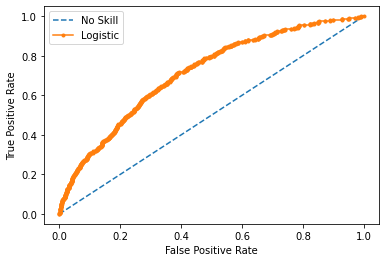

Accuracy score 0.928261
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9228
           1       0.17      0.15      0.16       432

    accuracy                           0.93      9660
   macro avg       0.56      0.56      0.56      9660
weighted avg       0.92      0.93      0.93      9660

[[8902  326]
 [ 367   65]]


In [168]:
### Logistic grid search

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20,random_state=1)

# Scaling

sc = MinMaxScaler()
#sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


c = np.arange(0.1,0.3,0.02)
lr_grid = {'model__C': c}

model = LogisticRegression(solver = 'saga', penalty = 'l1', max_iter = 300)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.3ni)

steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

search = GridSearchCV(estimator = pipeline, param_grid = lr_grid, cv = 3, scoring = 'roc_auc')

result = search.fit(X_train, y_train)

# get the best performing model fit on the whole training set
best_model = result.best_estimator_
# evaluate model on the hold out dataset
yhat = best_model.predict(X_test)

print('Logistic Regression Grid search')

# View best hyperparameters
#print('Best Penalty:', best_model.get_params()['penalty'])
print('Best C:', best_model.get_params()['model__C'])

#Accuracy
acc = accuracy_score(y_test, yhat)

##ROC and AUC
#No skill prediction
ns_probs = [0 for _ in range(len(y_test))]
#Model predictions

lr_probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#Results
print("Accuracy score %f" % acc)

print(classification_report(y_test, yhat))
print(confusion_matrix(y_test, yhat))

In [ ]:
#PCA
#X2 , y2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca_conf = PCA(svd_solver = 'full')
sc = StandardScaler()

X_trans = sc.fit_transform(X2)

pca_fit = pca_conf.fit(X_trans)


In [116]:
pca_fit.components_.shape

(903, 903)

In [120]:
pca_fit.components_[0] / pca_fit.components_[0].sum()

array([ 3.17622847e-04,  2.84067357e-04,  1.80221631e-03,  0.00000000e+00,
        3.24088716e-03, -3.76773235e-05,  2.31419636e-04,  1.38849564e-03,
        2.96425450e-04,  1.85353751e-03,  2.99143127e-04,  2.70989833e-03,
        1.35627727e-03,  1.23515811e-29,  6.97116826e-04,  2.45229016e-03,
        5.74650184e-03,  1.78727091e-03,  5.24741717e-04,  2.26347191e-03,
        3.55552367e-03,  5.09490877e-03,  6.95013313e-04,  0.00000000e+00,
        5.88723779e-03,  1.99399712e-03,  2.08457120e-03,  4.39038215e-04,
        2.93307216e-04,  6.05508910e-04,  1.88181322e-03,  1.74366725e-03,
        2.43884436e-04,  0.00000000e+00,  0.00000000e+00,  1.25574657e-03,
        3.40576209e-04,  2.36934600e-03,  3.08030409e-03,  4.28551747e-03,
        1.15978325e-03,  0.00000000e+00,  1.52659800e-03,  3.54729537e-03,
        5.49745993e-03,  0.00000000e+00,  6.38228701e-04,  6.46244481e-05,
        2.45963397e-03,  1.21955310e-03,  4.54260898e-03,  2.72217291e-03,
        3.99493812e-03,  

Gradient Boost Grid search
Best n: 100
Best depth: 10
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.714


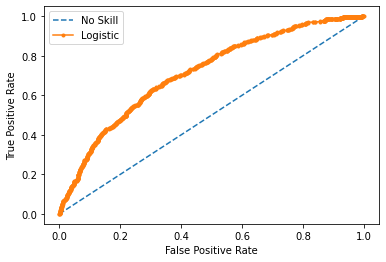

Accuracy score 0.955072
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9228
           1       0.00      0.00      0.00       432

    accuracy                           0.96      9660
   macro avg       0.48      0.50      0.49      9660
weighted avg       0.91      0.96      0.93      9660

[[9226    2]
 [ 432    0]]


In [77]:
####GB Grid Search
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler

#sorted(sklearn.metrics.SCORERS.keys())
from sklearn.metrics import make_scorer
mat_scorer = make_scorer(matthews_corrcoef)


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20,random_state=2)

# Scaling

sc = MinMaxScaler()
#sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


gb_grid = {'model__n_estimators': np.arange(50,101,25), 'model__max_depth': np.arange(5,11,1),
           #'min_samples_split': np.arange(3,11,1),
          'model__learning_rate': np.arange(0.01,0.02,0.01)}

model = ensemble.GradientBoostingClassifier(**params)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.3)

steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

search = GridSearchCV(estimator = pipeline, param_grid = gb_grid, cv = 5, scoring = mat_scorer)

result = search.fit(X_train, y_train)

# get the best performing model fit on the whole training set
best_model = result.best_estimator_
# evaluate model on the hold out dataset
yhat = best_model.predict(X_test)

print('Gradient Boost Grid search')

# View best hyperparameters
#print('Best Penalty:', best_model.get_params()['penalty'])
print('Best n:', best_model.get_params()['model__n_estimators'])
print('Best depth:', best_model.get_params()['model__max_depth'])

#Accuracy
acc = accuracy_score(y_test, yhat)

##ROC and AUC
#No skill prediction
ns_probs = [0 for _ in range(len(y_test))]
#Model predictions

lr_probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#Results
print("Accuracy score %f" % acc)

print(classification_report(y_test, yhat))
print(confusion_matrix(y_test, yhat, labels=[1, 0]))

In [112]:
import xgboost as xgb

Checking stratification
0.04411318150448585
0.043064182194616975
Checking dist before and after sampling
0    34627
1     1598
Name: hi_flag, dtype: int64
0    11540
1     3462
Name: hi_flag, dtype: int64
No Skill: ROC AUC=0.500
XGB: ROC AUC=0.720


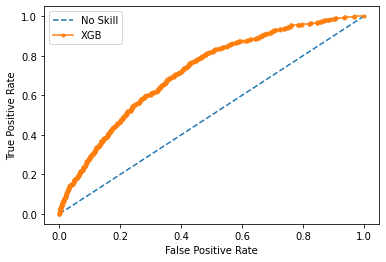

Accuracy score 0.947164
              precision    recall  f1-score   support

           1       0.19      0.07      0.10       520
           0       0.96      0.99      0.97     11555

    accuracy                           0.95     12075
   macro avg       0.57      0.53      0.54     12075
weighted avg       0.93      0.95      0.94     12075

[[   35   485]
 [  153 11402]]


In [123]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=1,
                              eval_metric="auc", n_estimators = 500, booster = 'gbtree',
                             scale_pos_weight = 1)


X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state=1)

print('Checking stratification')
print(sum(y_train)/len(y_train))
print(sum(y_test)/len(y_test))

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.3)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X = X_train
y = y_train

X_train, y_train = pipeline.fit_resample(X_train, y_train)

print('Checking dist before and after sampling')
print(y.value_counts())
print(y_train.value_counts())


xgb_model.fit(X_train, y_train)

yhat = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)

acc = accuracy_score(y_test, yhat)

##ROC and AUC
ns_probs = [0 for _ in range(len(y_test))]
#Model predictions

# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGB: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, xgb_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

#Results
print("Accuracy score %f" % acc)

print(classification_report(y_test, yhat , labels=[1, 0]))
print(confusion_matrix(y_test, yhat, labels=[1, 0]))

In [ ]:
####  XGB Grid Search
from sklearn.metrics import matthews_corrcoef
from sklearn.preprocessing import StandardScaler

#sorted(sklearn.metrics.SCORERS.keys())
from sklearn.metrics import make_scorer
mat_scorer = make_scorer(matthews_corrcoef)


for i in [(15,25),(35,45),(55,65), (105,205)]:
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20,random_state=i[0])

    # Scaling

    sc = MinMaxScaler()
    #sc = RobustScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)


    xgb_grid = {#'model__learning_rate': np.arange(0.05,0.35,0.05),
                'model__reg_alpha': [1e-5, 0.1],
                'model__max_depth':range(4,7,1),
                 'model__min_child_weight': np.arange(1,30,10),
               'model__gamma':[i/10.0 for i in range(3,6)],
                'model__n_estimators' : [60]
               }

    model = xgb.XGBClassifier(objective="binary:logistic", random_state=i[1],
                                  eval_metric="auc", booster = 'gbtree', learning_rate = 0.15
                             )


    over = SMOTE(sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=0.5)

    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)

    search = GridSearchCV(estimator = pipeline, param_grid = xgb_grid, cv = 5, scoring = 'roc_auc')

    result = search.fit(X_train, y_train)

    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test)

    print(' X Gradient Boost Grid search')

    # View best hyperparameters
    #print('Best Penalty:', best_model.get_params()['penalty'])
    #print('Best model__learning_rate:', best_model.get_params()['model__learning_rate'])
    print('Best model__reg_alpha:', best_model.get_params()['model__reg_alpha'])
    print('Best model__max_depth:', best_model.get_params()['model__max_depth'])
    print('Best model__min_child_weight:', best_model.get_params()['model__min_child_weight'])
    print('Best model__gamma:', best_model.get_params()['model__gamma'])
    print('Best model__n_estimators:', best_model.get_params()['model__n_estimators'])


    #Accuracy
    acc = accuracy_score(y_test, yhat)

    ##ROC and AUC
    #No skill prediction
    ns_probs = [0 for _ in range(len(y_test))]
    #Model predictions

    xgb_probs = best_model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    xgb_probs = xgb_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    xgb_auc = roc_auc_score(y_test, xgb_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('XGB: ROC AUC=%.3f' % (xgb_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

    #Results
    print("Accuracy score %f" % acc)

    print(classification_report(y_test, yhat))
    print(confusion_matrix(y_test, yhat, labels=[1, 0]))

In [116]:
best_model.get_params()

{'memory': None,
 'steps': [('over', SMOTE(sampling_strategy=0.1)),
  ('under', RandomUnderSampler(sampling_strategy=0.5)),
  ('model',
   XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                 colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
                 early_stopping_rounds=None, enable_categorical=False,
                 eval_metric='auc', gamma=0.4, gpu_id=-1, grow_policy='depthwise',
                 importance_type=None, interaction_constraints='',
                 learning_rate=0.15000000000000002, max_bin=256,
                 max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
                 min_child_weight=1, missing=nan, monotone_constraints='()',
                 n_estimators=40, n_jobs=0, num_parallel_tree=1, predictor='auto',
                 random_state=1, reg_alpha=1e-05, reg_lambda=1, ...))],
 'verbose': False,
 'over': SMOTE(sampling_strategy=0.1),
 'under': RandomUnderSampler(sampling_strategy=0.5),
 'model